In [1]:
import pandas as pd
import matplotlib.image as img
import matplotlib.pyplot as plt
import numpy as np

from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.math import confusion_matrix
from tensorflow.keras import utils
from tensorflow.keras.optimizers import SGD 

import tensorflow as tf
tf.random.set_seed(42)

#from keras.utils import to_categorical
#from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('../data-capstone/fer2013/fer2013.csv')

In [3]:
df.head()

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training


In [5]:
df.tail()

,emotion,pixels,Usage
35882,6,50 36 17 22 23 29 33 39 34 37 37 37 39 43 48 5...,PrivateTest
35883,3,178 174 172 173 181 188 191 194 196 199 200 20...,PrivateTest
35884,0,17 17 16 23 28 22 19 17 25 26 20 24 31 19 27 9...,PrivateTest
35885,3,30 28 28 29 31 30 42 68 79 81 77 67 67 71 63 6...,PrivateTest
35886,2,19 13 14 12 13 16 21 33 50 57 71 84 97 108 122...,PrivateTest


In [6]:
df.shape

(35887, 3)

In [4]:
#0 - 'Angry'1 - 'Disgust'2 - 'Fear' 3 - 'Happy' 4 - 'Sad' 5 - 'Surprise'6 - 'Neutral'
emotion = {'angry': 0, 'disgust': 1, 'fear': 2, 'happy': 3, 'sad': 4, 'surprise': 5, 'neutral': 6}

In [8]:
image1 = np.fromstring(df['pixels'][1], sep= ' ').reshape(48,48)

In [9]:
image1

array([[151., 150., 147., ..., 129., 140., 120.],
       [151., 149., 149., ..., 122., 141., 137.],
       [151., 151., 156., ..., 109., 123., 146.],
       ...,
       [188., 188., 121., ..., 185., 185., 186.],
       [188., 187., 196., ..., 186., 182., 187.],
       [186., 184., 185., ..., 193., 183., 184.]])

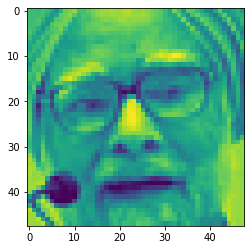

In [11]:
#image = img.imread(image1)
plt.imshow(image1)
#plt.show()

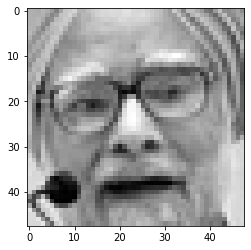

In [12]:
imgplot = plt.imshow(image1, cmap='gray')

In [21]:
def image_plot(num):
    image1 = np.fromstring(df['pixels'][num], sep= ' ').reshape(48,48)
    return plt.imshow(image1, cmap='gray')

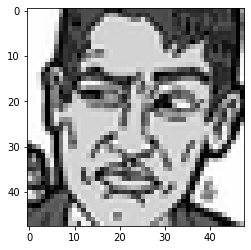

In [22]:
image_plot(28709)

##  Preprocessing image data

In [23]:
df.shape

(35887, 3)

In [33]:
df.head()

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training


In [13]:
df.dtypes

emotion     int64
pixels     object
Usage      object
dtype: object

In [14]:
df.isnull().sum()

emotion    0
pixels     0
Usage      0
dtype: int64

## Works

In [23]:
df_train = df.loc[df['Usage']=='Training']
df_test = df.loc[df['Usage']!='Training']
df_train.shape

(28709, 3)

In [4]:
train_data =[]
for i in range(len(df_train)):
    image_train = np.fromstring(df_train['pixels'][i], sep= ' ').reshape(48, 48)
    image_train = image_train.astype(np.uint8)/255.0
    train_data.append(image_train)

In [26]:
len(train_data)

28709

In [12]:
df_test.head()

,emotion,pixels,Usage
28709,0,254 254 254 254 254 249 255 160 2 58 53 70 77 ...,PublicTest
28710,1,156 184 198 202 204 207 210 212 213 214 215 21...,PublicTest
28711,4,69 118 61 60 96 121 103 87 103 88 70 90 115 12...,PublicTest
28712,6,205 203 236 157 83 158 120 116 94 86 155 180 2...,PublicTest
28713,3,87 79 74 66 74 96 77 80 80 84 83 89 102 91 84 ...,PublicTest


In [5]:
#Needed to adjust the iteration values since the way we split the dataframe into train and test
test_data = []
for j in range(28709, (28709 + len(df_test))):
    image_test = np.fromstring(df_test['pixels'][j], sep= ' ').reshape(48, 48)
    image_test = image_test.astype(np.uint8)/255.0
    test_data.append(image_test)

In [19]:
len(image_test)

48

In [25]:
X_train = np.array(train_data)
X_train = np.expand_dims(X_train, -1) 
X_test = np.array(test_data)
X_test = np.expand_dims(X_test, -1) 

y_train = df_train['emotion']

y_test = df_test['emotion']

In [30]:

y_train = utils.to_categorical(y_train, 7)
y_test = utils.to_categorical(y_test, 7)

In [31]:
y_test.shape

(7178, 7)

In [32]:
y_train.shape

(28709, 7)

In [34]:
y_train

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

In [ ]:
y_train = utils.to_categorical(y_train, num_classes = 7)
np.array(y_train)

In [13]:
np.fliplr(X_test)
np.fliplr(X_train)
X_test.shape

(7178, 48, 48, 1)

In [14]:
X_train.shape

(28709, 48, 48, 1)

In [35]:
X_train

array([[[[0.2745098 ],
         [0.31372549],
         [0.32156863],
         ...,
         [0.20392157],
         [0.16862745],
         [0.16078431]],

        [[0.25490196],
         [0.23921569],
         [0.22745098],
         ...,
         [0.21960784],
         [0.20392157],
         [0.17254902]],

        [[0.19607843],
         [0.16862745],
         [0.21176471],
         ...,
         [0.19215686],
         [0.21960784],
         [0.18431373]],

        ...,

        [[0.35686275],
         [0.25490196],
         [0.16470588],
         ...,
         [0.28235294],
         [0.21960784],
         [0.16862745]],

        [[0.30196078],
         [0.32156863],
         [0.30980392],
         ...,
         [0.41176471],
         [0.2745098 ],
         [0.18039216]],

        [[0.30196078],
         [0.28235294],
         [0.32941176],
         ...,
         [0.41568627],
         [0.42745098],
         [0.32156863]]],


       [[[0.59215686],
         [0.58823529],
         [0.57

## Doesn't work

In [124]:
#the current pixels are strings and need to be converted to numbers
for i in range(len(df)):
    try:
        df.at[i, 'pixels'] = np.fromstring(df['pixels'][i], sep= ' ').reshape(48,48)
    except:
        print(i)

In [125]:
df.head()

,emotion,pixels,Usage
0,0,"[[70.0, 80.0, 82.0, 72.0, 58.0, 58.0, 60.0, 63...",Training
1,0,"[[151.0, 150.0, 147.0, 155.0, 148.0, 133.0, 11...",Training
2,2,"[[231.0, 212.0, 156.0, 164.0, 174.0, 138.0, 16...",Training
3,4,"[[24.0, 32.0, 36.0, 30.0, 32.0, 23.0, 19.0, 20...",Training
4,6,"[[4.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",Training


In [126]:
df.dtypes

emotion     int64
pixels     object
Usage      object
dtype: object

In [127]:
df_train = df.loc[df['Usage']=='Training']
df_test = df.loc[df['Usage']!='Training']
df_train.shape

(28709, 3)

In [128]:
#Note: the original dataset was for a kaggle submission.  Private test was for your model testing and 
#public test was for the submission
df_test.head()

,emotion,pixels,Usage
28709,0,"[[254.0, 254.0, 254.0, 254.0, 254.0, 249.0, 25...",PublicTest
28710,1,"[[156.0, 184.0, 198.0, 202.0, 204.0, 207.0, 21...",PublicTest
28711,4,"[[69.0, 118.0, 61.0, 60.0, 96.0, 121.0, 103.0,...",PublicTest
28712,6,"[[205.0, 203.0, 236.0, 157.0, 83.0, 158.0, 120...",PublicTest
28713,3,"[[87.0, 79.0, 74.0, 66.0, 74.0, 96.0, 77.0, 80...",PublicTest


In [ ]:
#X_train = tf.convert_to_tensor(df_train['pixels'])
X_train = np.asarray(df_train['pixels'])
#X_train = np.asarray(X_train).astype(np.'float32')

y_train = df_train['emotion']


#X_test = tf.convert_to_tensor(df_test['pixels'])
X_test = np.asarray(df_test['pixels'])
#X_test = np.asarray(X_test).astype('float32')
y_test = df_test['emotion']

In [ ]:
X_train.dtype

In [ ]:
X_train

## building the model

#### preprocessing

### might delete if above code works

In [132]:
 #Image Preprocessing


# The current range of X_train and X_test is 0 to 255.
# The code below is equivalent to X_train = X_train / 255.
# This scales each value to be between 0 and 1.

#X_train /= 255.0
#X_test /= 255.0

X_train = X_train.astype(np.uint8)/255.0
X_test = X_test.astype(np.uint8)/255.0


# Reshape each image to be 28 x 28 x 1.
# The 1 corresponds to the one black/white value.
# If we had a color image, we would likely use 3 for RGB.
#x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
#x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

# Change y_train.
#y_train = utils.to_categorical(y_train, 10)
#y_test = utils.to_categorical(y_test, 10)

ValueError: setting an array element with a sequence.

# MODEL

In [36]:

model = Sequential()
model.add(Conv2D(
      filters=64,
      kernel_size=(3, 3),
      activation='relu',
      input_shape=(48, 48, 1)
))
model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Conv2D(
#      filters=128,
#      kernel_size =(3, 3),
#      activation ='relu'
#))
#model.add(Conv2D(
#      filters=128,
#      kernel_size =(3, 3),
#      activation ='relu'
#))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(7, activation='softmax'))

model.compile(loss='categorical_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])

In [37]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 46, 46, 64)        640       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 23, 23, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 33856)             0         
_________________________________________________________________
dense_4 (Dense)              (None, 256)               8667392   
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 7)                 1799      
Total params: 8,669,831
Trainable params: 8,669,831
Non-trainable params: 0
____________________________________________

In [38]:
history = model.fit(
      X_train,
      y_train, 
      #batch_size=64,
      validation_data=(X_test, y_test),
      epochs=5,
      verbose=1)

Epoch 1/5
898/898 [==============================] - 134s 148ms/step - loss: 1.6798 - accuracy: 0.3356 - val_loss: 1.5183 - val_accuracy: 0.4153
Epoch 2/5
898/898 [==============================] - 135s 151ms/step - loss: 1.5115 - accuracy: 0.4167 - val_loss: 1.4335 - val_accuracy: 0.4434
Epoch 3/5
898/898 [==============================] - 134s 149ms/step - loss: 1.4288 - accuracy: 0.4509 - val_loss: 1.4087 - val_accuracy: 0.4582
Epoch 4/5
898/898 [==============================] - 135s 151ms/step - loss: 1.3607 - accuracy: 0.4769 - val_loss: 1.3698 - val_accuracy: 0.4720
Epoch 5/5
898/898 [==============================] - 132s 147ms/step - loss: 1.2906 - accuracy: 0.5062 - val_loss: 1.3505 - val_accuracy: 0.4794


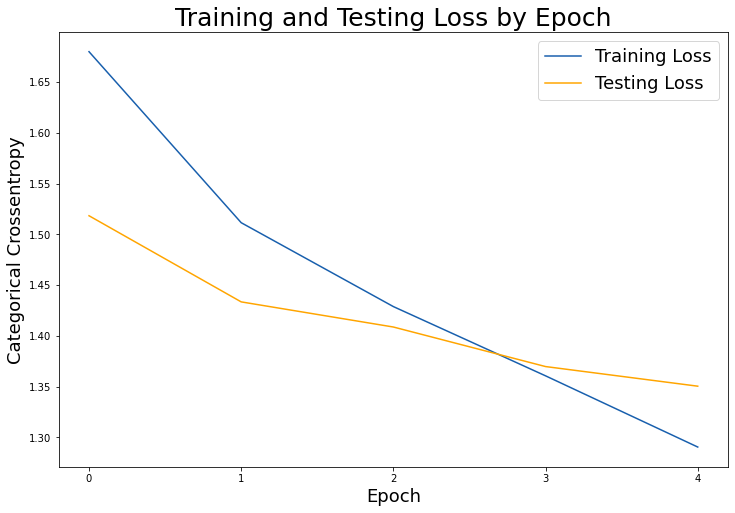

In [39]:
# Check out our train loss and test loss over epochs.
train_loss = history.history['loss']
test_loss = history.history['val_loss']
epoch_labels = history.epoch

# Set figure size.
plt.figure(figsize=(12, 8))

# Generate line plot of training, testing loss over epochs.
plt.plot(train_loss, label='Training Loss', color='#185fad')
plt.plot(test_loss, label='Testing Loss', color='orange')

# Set title
plt.title('Training and Testing Loss by Epoch', fontsize=25)
plt.xlabel('Epoch', fontsize=18)
plt.ylabel('Categorical Crossentropy', fontsize=18)
plt.xticks(epoch_labels, epoch_labels)    # ticks, labels

plt.legend(fontsize=18);

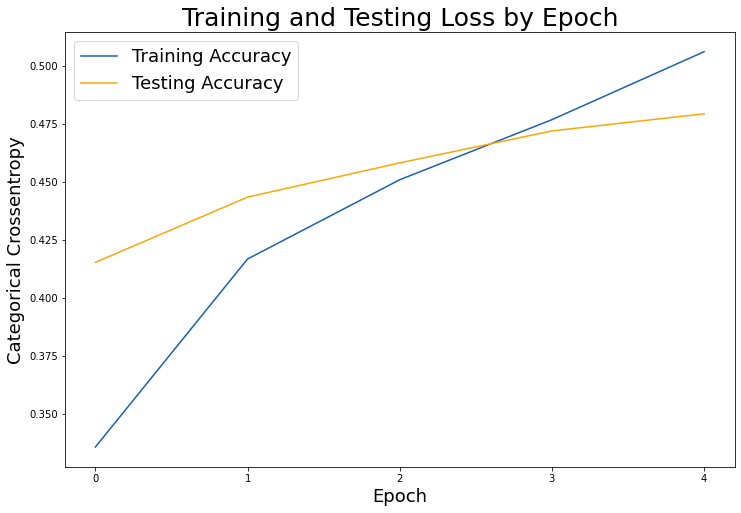

In [40]:
# Check out our train loss and test loss over epochs.
train_acc = history.history['accuracy']
test_acc = history.history['val_accuracy']
epoch_labels = history.epoch

# Set figure size.
plt.figure(figsize=(12, 8))

# Generate line plot of training, testing loss over epochs.
plt.plot(train_acc, label='Training Accuracy', color='#185fad')
plt.plot(test_acc, label='Testing Accuracy', color='orange')

# Set title
plt.title('Training and Testing Loss by Epoch', fontsize=25)
plt.xlabel('Epoch', fontsize=18)
plt.ylabel('Categorical Crossentropy', fontsize=18)
plt.xticks(epoch_labels, epoch_labels)    # ticks, labels

plt.legend(fontsize=18);